In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../datasets/placement.csv")
df.sample(10)

,Unnamed: 0,cgpa,iq,placement
44,44,7.5,61.0,1
99,99,6.2,113.0,1
68,68,4.0,75.0,0
83,83,7.5,130.0,1
90,90,7.3,86.0,1
50,50,3.5,233.0,0
42,42,7.6,89.0,1
16,16,5.2,224.0,0
0,0,6.8,123.0,1
56,56,6.1,65.0,0


In [3]:
df.shape, df.size

((100, 4), 400)

# 0 understand the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


array([[<AxesSubplot: title={'center': 'Unnamed: 0'}>,
        <AxesSubplot: title={'center': 'cgpa'}>],
       [<AxesSubplot: title={'center': 'iq'}>,
        <AxesSubplot: title={'center': 'placement'}>]], dtype=object)

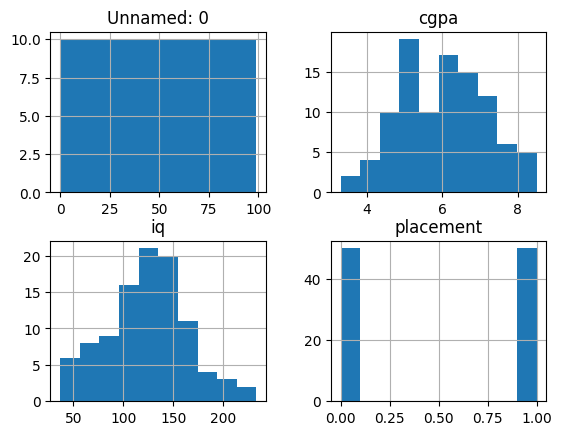

In [6]:
df.hist(bins=10)

In [7]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [8]:
df.duplicated().sum()

0

1. No Missing Values
2. No duplicacy
3. No categorical Data
4. un necessary column unnamed

In [9]:
df = df.iloc[:,1:]
df.sample(10)

,cgpa,iq,placement
37,8.1,149.0,1
7,5.0,63.0,0
53,8.3,168.0,1
26,7.0,199.0,1
87,5.7,132.0,1
33,6.0,149.0,0
48,6.6,138.0,1
36,5.7,140.0,0
17,3.3,183.0,0
18,4.0,100.0,0


## EDA

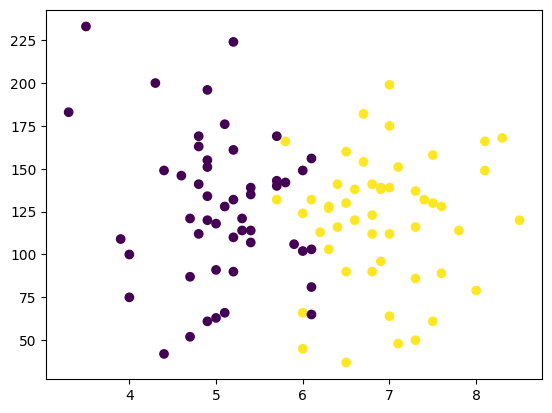

In [10]:
plt.scatter(df["cgpa"],df['iq'],c=df["placement"])

### Data is linearly seperated and simple in nature so logistic regression should be a good algorithm for this one

## 1. Extract depedant and independent variables

In [11]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [12]:
X.shape, Y.shape

((100, 2), (100,))

## 2. Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [15]:
X_train

,cgpa,iq
66,6.9,96.0
64,7.0,64.0
59,4.8,112.0
33,6.0,149.0
85,5.8,166.0
...,...,...
35,6.8,90.0
96,4.4,42.0
55,7.8,114.0
15,5.1,176.0


## 3. Scaling Data

In [16]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

In [17]:
X_train = scalar.fit_transform(X_train)

In [18]:
X_test = scalar.transform(X_test)

## 4. Training Model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_reg = LogisticRegression()

In [21]:
log_reg.fit(X_train,Y_train)

LogisticRegression()

## 5. Evaluating the model

In [22]:
y_predict = log_reg.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
acc_score = accuracy_score(Y_test,y_predict)
acc_score

0.9

### Plotting Decision Boundary

In [25]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

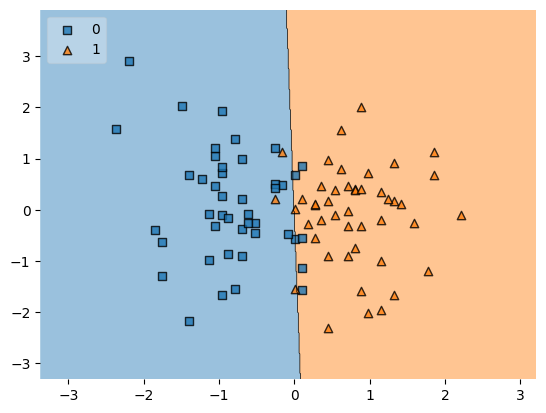

In [27]:
plot_decision_regions(X_train,Y_train.values, clf=log_reg,legend=2)

In [28]:
import joblib

joblib.dump(log_reg,"logistic_reg_student_placement.pkl")

['logistic_reg_student_placement.pkl']